# <center>Cracking the Cocoa Code:</center> 
# <center>Unleashing Tasty Secrets for Chocolate Domination!</center>

### 1.1 Introduction

Welcome to the sweet and thrilling world of the chocolate industry! It's a wild ride filled with fierce competition and constant excitement. You see, chocolate lovers are always on the hunt for new and extraordinary experiences, demanding nothing but the best. To conquer this fantastical realm, businesses need to dive deep into the whims and desires of these chocolate enthusiasts, navigating the ever-shifting tides of consumer preferences and trends.

But fear not, brave entrepreneurs! The chocolate bar dataset is here to save the day, offering a treasure trove of knowledge. It holds the key to unlocking profound insights into the mysterious realm of consumer behavior. Armed with this wisdom, businesses can strategically mold their chocolate creations to meet the demands of the market, capturing the hearts and taste buds of chocoholics everywhere.

So, step into the world of cocoa magic, where dreams are made of chocolate, and let the dataset be your guide on this delectable adventure!

### 1.2 Business Understanding

Get ready for a tasty adventure in the chocolate industry! Our mission is to unwrap the secrets hidden within the chocolate bar dataset and discover the key ingredients for business triumph. By diving into consumer preferences and decision-making, we'll concoct data-driven strategies that will make mouths water and cash registers sing. Don't worry, though, this dataset is like a delicious treat with a few missing sprinkles. We wish it included marketing magic like advertising costs and research expenses, because that would have given us even more insight into customer ratings. But fear not, we'll still whip up some sweet solutions and gain a competitive edge in the market. Let the chocolate journey begin!

#### 1.2.1 Business Problem

In my chocolate-fueled adventure, I embarked on a quest to discover the best chocolate bar in town. Online ratings led me down a rabbit hole, filled with tantalizing questions:

1. What flavor profiles make chocolate bars soar in customer ratings?
2. How does cocoa percentage affect consumer preferences?
3. Does the country of origin influence chocolate bar perceptions?

Armed with curiosity, I ventured forth, ready to uncover these delicious mysteries. The quest for chocolate enlightenment had begun!

These questions provide a starting point for investigating consumer preferences and the factors that influence ratings and choices in the chocolate bar dataset. The specific research questions can be refined based on the objectives of the study and the available data.

#### 1.2.2 Performance Measure

I have chosen correlation coefficient as a performance so we can assess the linear relationship between variables, with values ranging from -1 to 1. A correlation value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation. A value close to 0 suggests a weak or no correlation between the variables. This performance measure is valuable in various fields, including finance, economics, psychology, and research, to analyze the connections between different factors and make informed decisions based on the observed relationships. 
Success here will mean that I succeeded in locating the most important variable that leads to high chocolate bar rating.

### 1.3 Data Understanding

This database contains over 2,500 chocolate bar ratings from around the globe!

Its focused on plain dark chocolate with an aim of appreciating the flavors of the cacao when made into chocolate. The ratings do not reflect health benefits, social missions, or organic status.

Each chocolate is evaluated from a combination of both objective qualities and subjective interpretation. A rating here only represents an experience with one bar from one batch. Batch numbers, vintages and review dates are included in the database when known.

#### Flavors of Cacao Rating System:

Flavors of Cacao Rating System:
5 = Elite (Transcending beyond the ordinary limits)
4 = Premium (Superior flavor development, character and style)
3 = Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
2 = Disappointing (Passable but contains at least one significant flaw)
1 = Unpleasant (mostly unpalatable)

##### Python Libraries

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# To disable the warning that pandas generates when performing chained assignments.
pd.options.mode.chained_assignment = None

# To display max rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

#### 1.3.1 Let's load the data

In [57]:
df = pd.read_csv("chocolate_bars.csv")

**The info() method is a quick way to get description of the data, it shows the total number of rows, each attributes data type and Non-Null Count.**

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


- The DataFrame has a total of 2530 entries (rows) and 11 columns.
- The columns in the DataFrame are named 'id', 'manufacturer', 'company_location', 'year_reviewed', 'bean_origin', 'bar_name', 'cocoa_percent', 'num_ingredients', 'ingredients', 'review', and 'rating'.
- The 'id', 'manufacturer', 'company_location', and 'year_reviewed' columns are of integer data type (int64).
- The 'bean_origin', 'bar_name', 'ingredients', and 'review' columns are of object data type (string).
- The 'cocoa_percent', 'num_ingredients', and 'rating' columns are of float data type (float64).
- The 'num_ingredients' column and the 'ingredients' column have some missing values (non-null count is less than the total number of entries).
- The memory usage of the DataFrame is approximately 217.5 KB.

This information provides a summary of the data types and missing values present in each column of the DataFrame. It gives an overview of the structure and composition of the DataFrame, which can help in further data exploration and analysis.

**The code block below allows us to loop through the data and see if there is anything missing**

In [59]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
manufacturer - 0%
company_location - 0%
year_reviewed - 0%
bean_origin - 0%
bar_name - 0%
cocoa_percent - 0%
num_ingredients - 3%
ingredients - 3%
review - 0%
rating - 0%


- The 'id', 'manufacturer', 'company_location', 'year_reviewed', 'bean_origin', 'bar_name', 'cocoa_percent', 'review', and 'rating' columns have no missing values (0% missing).
- The 'num_ingredients' and 'ingredients' columns have 3% missing values each.

This output informs us that the proportion of missing values in each column of the DataFrame. It indicates that the 'num_ingredients' and 'ingredients' columns have some missing data, with approximately 3% of values being absent.

**The describe() methods shows a summary of the numerical fields**

In [60]:
df.describe()

,id,year_reviewed,cocoa_percent,num_ingredients,rating
count,2530.000000,2530.000000,2530.000000,2443.000000,2530.000000
mean,1429.800791,2014.374308,71.639723,3.041343,3.196344
std,757.648556,3.968267,5.616724,0.913728,0.445321
min,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,802.000000,2012.000000,70.000000,2.000000,3.000000
50%,1454.000000,2015.000000,70.000000,3.000000,3.250000
75%,2079.000000,2018.000000,74.000000,4.000000,3.500000
max,2712.000000,2021.000000,100.000000,6.000000,4.000000


- count: Represents the number of non-null values in each column.
- mean: Indicates the average value of each column.
- std: Represents the standard deviation, which measures the dispersion or spread of values around the mean.
- min: Specifies the minimum value observed in each column.
- 25%: Represents the first quartile or the 25th percentile, indicating the value below which 25% of the data falls.
- 50%: Represents the second quartile or the median, which divides the data into two equal halves.
- 75%: Represents the third quartile or the 75th percentile, indicating the value below which 75% of the data falls.
- max: Specifies the maximum value observed in each column.

Now, let's interpret the output for each column:

id: The 'id' column ranges from 5 to 2712, with a mean of approximately 1429.8.
year_reviewed: The 'year_reviewed' column ranges from 2006 to 2021, with a mean of approximately 2014.37.
cocoa_percent: The 'cocoa_percent' column ranges from 42 to 100, with a mean of approximately 71.64.
num_ingredients: The 'num_ingredients' column ranges from 1 to 6, with a mean of approximately 3.04. There are missing values (count is 2443 instead of 2530).
rating: The 'rating' column ranges from 1 to 4, with a mean of approximately 3.20.

These summary statistics provide a high-level overview of the distribution and central tendency of each numerical column in the DataFrame. They help to understand the range, variation, and general patterns within the data.

**Lets look at the first five rows of the dataset using the head() method**

In [61]:
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


There are 11 attributes in the dataset as follows:
REF (reference number). The highest REF numbers were the last entries made. They are not unique values
Manufacturer (Company name or manufacturer)
Company_location (Country)
year_reviewed (Date of review of the chocolate ratings)
bean_origin (Origin of bean (Country))
 bar name (Specific bean origin)
Cocoa percent
Ingredients: Represents the number of ingredients in the chocolate; B = Beans, S = Sugar, S* = Sweetener other than white cane or beet sugar, C = Cocoa Butter, V = Vanilla, L = Lecithin, Sa = Salt)
review (Most memorable characteristics)
Rating

**Let's remove the incorrect value in the manufcturer's name column**

In [62]:
df["manufacturer"] = df["manufacturer"].replace("5150",np.nan)

since we are not sure 5150 is a manufacturer name or an error let's make it a Null value so it can be removed along side other null values that will be removed.

**Let's fill Null values in the num_ingredients column with its mean**

In [63]:
df["num_ingredients"].fillna(np.mean(df["num_ingredients"]),inplace=True)

only 3% of the the coulmn is missing filling in missing values with the mean of the column will have no significant effect on the analysis.

**Dropping Null values with the dropna() method**

In [64]:
df = df.dropna()

dropped rows with missing vlues

**code below checks if there are any NULL values left**

In [65]:
df.isnull().sum()

id                  0
manufacturer        0
company_location    0
year_reviewed       0
bean_origin         0
bar_name            0
cocoa_percent       0
num_ingredients     0
ingredients         0
review              0
rating              0
dtype: int64

Hurrah! we have gotten rid of the empty values in the best way possible!

**Here we are assigning the rating system to a column based on rating**

In [66]:
df = df.reset_index()
rs = []
dr = df.rating
for rw in dr:
    if rw == 5.0:
        rs.append("elite")
    elif rw >= 4.0:
        rs.append("premium")
    elif rw >= 3.75:
        rs.append("praiseworthy")
    elif rw >= 3.0:
        rs.append("satisfactory")
    elif rw >= 2.0:
        rs.append("disappointing")
    else:
        rs.append("unpleasant")
df["rating_system"] = rs

Flavors of Cacao Rating System: 
- 5 = Elite (Transcending beyond the ordinary limits) 
- 4 = Premium (Superior flavor development, character and style) 
- 3 = Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities) 
- 2 = Disappointing (Passable but contains at least one significant flaw) 
- 1 = Unpleasant (mostly unpalatable)

**A quick look at the data again after adding the rating_system column**

In [67]:
df.head()

,index,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,rating_system
0,7,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,4.0,"B,S,C,L","vegetal, nutty",3.50,satisfactory
1,8,797,A. Morin,France,2012,Peru,Peru,63.0,4.0,"B,S,C,L","fruity, melon, roasty",3.75,praiseworthy
2,9,1011,A. Morin,France,2013,Panama,Panama,70.0,4.0,"B,S,C,L","brief fruit note, earthy, nutty",2.75,disappointing
3,10,1015,A. Morin,France,2013,Colombia,Colombie,70.0,4.0,"B,S,C,L","burnt rubber,alkalyzed notes",2.75,disappointing
4,11,1011,A. Morin,France,2013,Madagascar,"Madagascar, Criollo",70.0,4.0,"B,S,C,L","sticky, red fruit, sour",3.00,satisfactory


#### 1.3.2 Exploratory Data Analysis 

**Let's meet the top manufacturers**

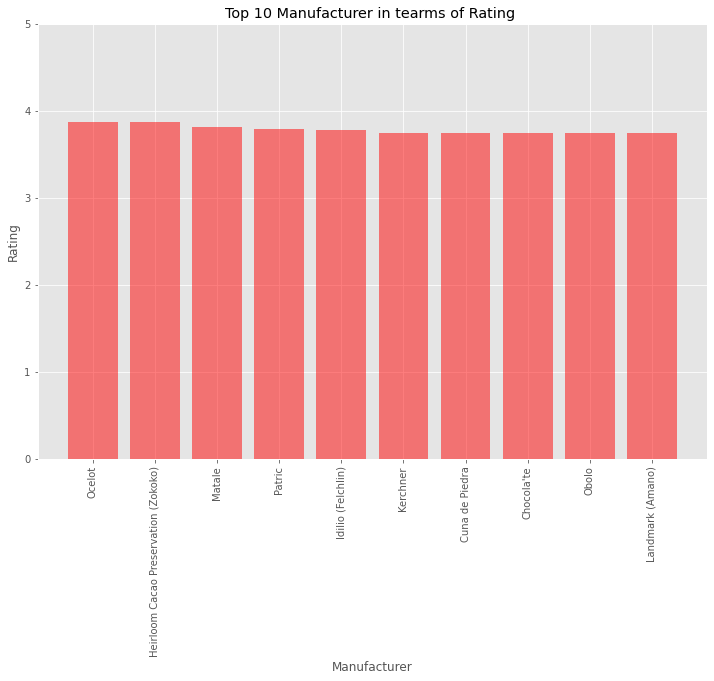

In [68]:
top_movies = df[["manufacturer", "rating"]].groupby("manufacturer").mean().reset_index().sort_values(by="rating",ascending=False).head(10)
plt.bar(top_movies.manufacturer, top_movies.rating, color="red", alpha=0.5)
plt.title("Top 10 Manufacturer in tearms of Rating ")
plt.xticks(rotation=90)
plt.ylim([0,5])
plt.xlabel("Manufacturer")
plt.ylabel("Rating")
plt.show()

In [69]:
top_movies = df[["manufacturer", "rating", "company_location"]].groupby(["manufacturer"]).mean().reset_index().sort_values(by="rating",ascending=False).head(3)
top_movies

,manufacturer,rating
374,Ocelot,3.8750
240,Heirloom Cacao Preservation (Zokoko),3.8750
324,Matale,3.8125


Manufacturer: Ocelot
Rating: 3.8750
This entry indicates that the manufacturer "Ocelot" has a rating of 3.8750.

Manufacturer: Heirloom Cacao Preservation (Zokoko)
Rating: 3.8750
This entry represents another manufacturer named "Heirloom Cacao Preservation" (Zokoko). It has the same rating of 3.8750 as the previous entry. This indicates that both Ocelot and Heirloom Cacao Preservation have the same rating, suggesting that they might be comparable in terms of the criteria being evaluated.

**Let's take a tour of the countries and see the rating of each location** 

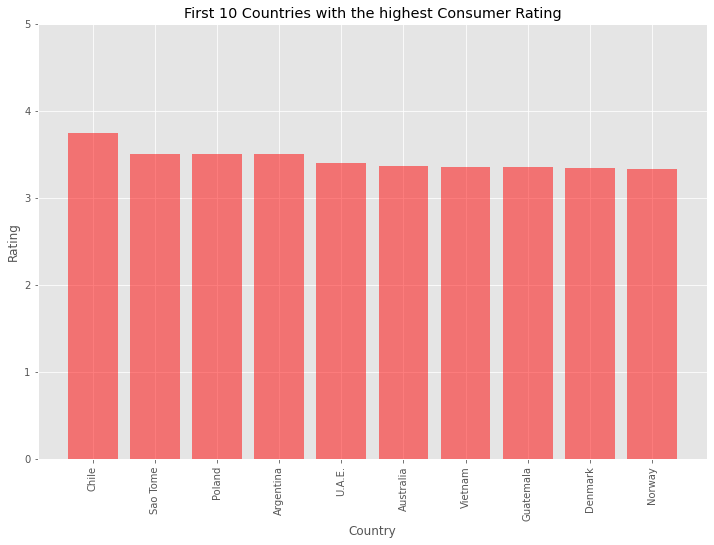

In [70]:
top_countries = df[["company_location", "rating"]].groupby("company_location").mean().reset_index().sort_values(by="rating",ascending=False).head(10)
plt.bar(top_countries["company_location"], top_countries.rating, color="red", alpha=0.5)
plt.title("First 10 Countries with the highest Consumer Rating")
plt.xticks(rotation=90)
plt.ylim([0,5])
plt.xlabel("Country")
plt.ylabel("Rating")
plt.show()

In [71]:
top_countries = df[["company_location", "rating"]].groupby("company_location").mean().reset_index().sort_values(by="rating",ascending=False).head(10)
top_countries.head()

,company_location,rating
8,Chile,3.75
46,Sao Tome,3.50
42,Poland,3.50
1,Argentina,3.50
60,U.A.E.,3.40


- Chile: The chocolate bars in Chile have an average rating of 3.75 wich is the highest.
- Sao Tome: The chocolate bars in Sao Tome have an average rating of 3.50.
- Poland: The chocolate bars in Poland have an average rating of 3.50.
- Argentina: The chocolate bars in Argentina have an average rating of 3.50.
- U.A.E.: The chocolate bars in the United Arab Emirates (U.A.E.) have an average rating of 3.40.

The ratings are based on some form of evaluation or feedback from consumers, where higher ratings generally indicate better quality or satisfaction with the chocolate bars.

**Let's time travel, how has chocolate bar ratings done over the years**

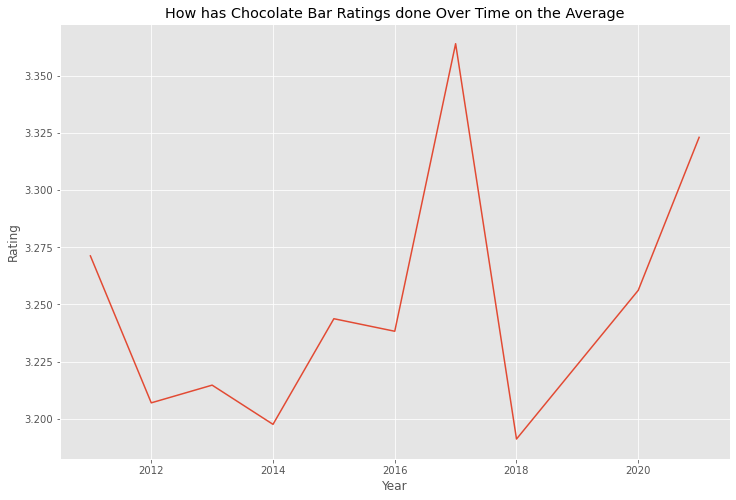

In [72]:
top_movies = df[["year_reviewed", "rating"]].groupby("year_reviewed").mean().reset_index().sort_values(by="rating",ascending=False).head(10)
sns.lineplot(x="year_reviewed", y ="rating", data=top_movies)
plt.title("How has Chocolate Bar Ratings done Over Time on the Average")
#plt.xticks(rotation=90)
#plt.ylim([0,3.5])
plt.xlabel("Year")
plt.ylabel("Rating")
plt.show()

In [73]:
top_movies = df[["year_reviewed", "rating"]].groupby("year_reviewed").mean().reset_index().sort_values(by="rating",ascending=False).head()
top_movies

,year_reviewed,rating
11,2017,3.364078
15,2021,3.323099
5,2011,3.271242
14,2020,3.256173
9,2015,3.243750


So we when back in time and obserevd the rise and fall of the ratings till present day. Looking at the line graph it's obvious ratings rose over time on the average. 2017 with a rating of 3.36 though the higest kind of looks like an anomaly, the reason for the spike may be checked later. we can also go into the furture to predict if the ratings will continue to increase or drop, but we will not be travelling into the future in this research.

**Let's break some columns into numerical categories so they are easier to work with**

In [131]:
fg = df.copy()
fg['nbean_origin'] = fg['bean_origin'].astype('category').cat.codes
fg["nmanufacturer"] = fg["manufacturer"].astype('category').cat.codes
fg["ncompany_location"] = fg["company_location"].astype('category').cat.codes
fg["ningredients"] = fg["ingredients"].astype('category').cat.codes
fg["nreview"] = fg["review"].astype('category').cat.codes
fg["nrating_system"] = fg["rating_system"].astype('category').cat.codes
fg['ncocoa_percent'] = fg['cocoa_percent'].astype('category').cat.codes
fg['nnum_ingredients'] = fg['num_ingredients'].astype('category').cat.codes

**'astype('category').cat.codes' performs categorical encoding on the columns.**

**Let's see if manufacturers and ratings have a relationship**

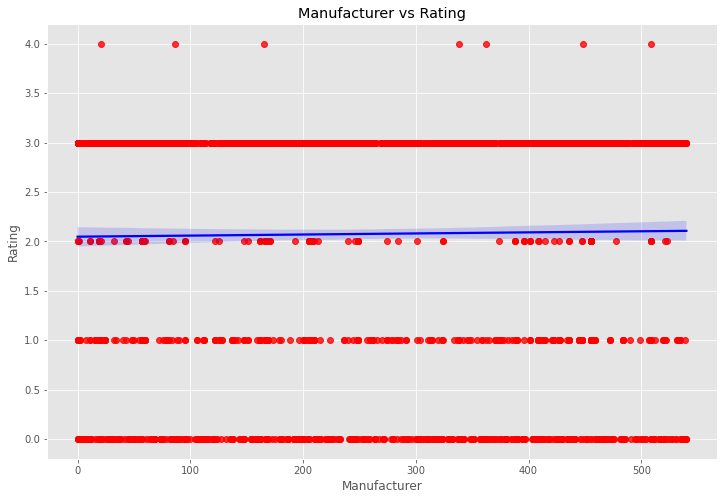

In [132]:
sns.regplot(x="nmanufacturer", y="nrating_system", data=fg, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

plt.title("Manufacturer vs Rating")

plt.xlabel('Manufacturer')

plt.ylabel('Rating')

plt.show()

In [76]:
correlation = fg['nmanufacturer'].corr(fg['nrating_system'])
print(correlation)

0.013814960931276236


The correlation coefficient between "chocolate bar manufacturers" and "customer rating" of 0.0138 suggests that there is a minimal positive association between the specific chocolate bar manufacturers and the ratings provided by customers. However, the correlation is close to zero, indicating that there is almost no linear relationship between these variables. In other words, the manufacturer of the chocolate bar does not strongly influence the customer ratings.

**Let's see if Company's locaton determines how the chocolate bars where rated**

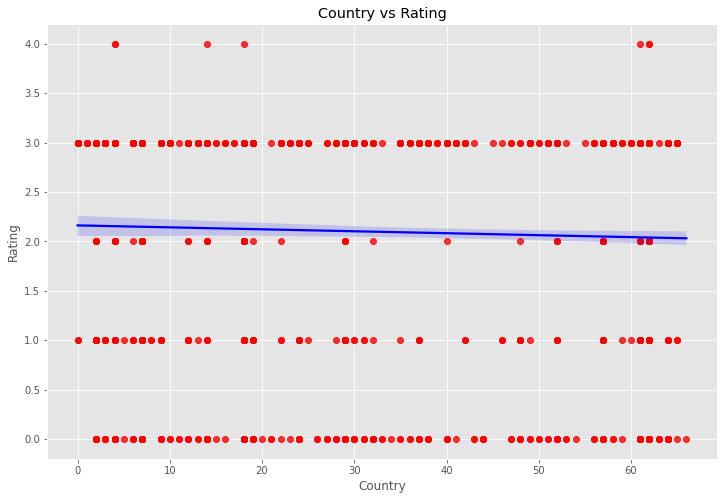

In [77]:
sns.regplot(x="ncompany_location", y="nrating_system", data=fg, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

plt.title("Country vs Rating")

plt.xlabel('Country')

plt.ylabel('Rating')

plt.show()

In [78]:
correlation = fg['ncompany_location'].corr(fg['nrating_system'])
print(correlation)

-0.03631529000139432


The correlation coefficient of -0.0363 between chocolate bar company location and customer rating suggests a very weak negative relationship between these two variables.
In this case, the value of -0.0363 indicates a close-to-zero negative correlation, which implies that there is almost no linear relationship between the company location and customer rating.

Interpreting this correlation, we can say that there is no significant or meaningful association between the location of the chocolate bar company and the ratings given by customers. In other words, the location of the company does not have a noticeable impact on the ratings assigned by customers. Other factors, such as the quality of the chocolate, ingredients, brand reputation, or marketing, may have a more significant influence on customer ratings.

**Let's see if origin country of the chocolate bean determines how the chocolate bars where rated**

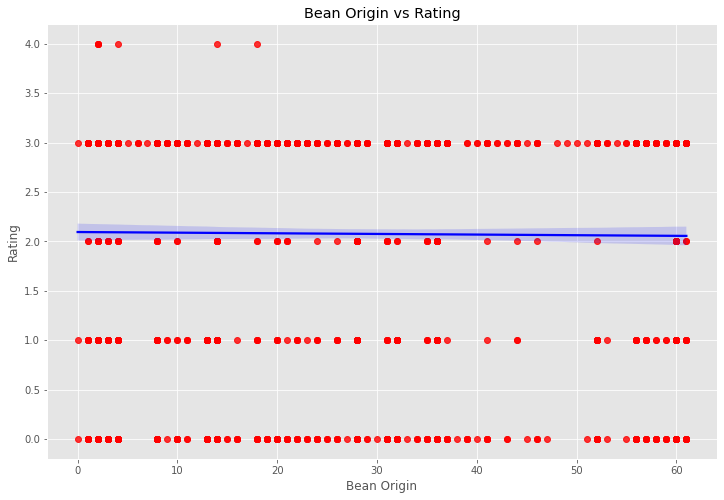

In [79]:
sns.regplot(x="nbean_origin", y="nrating_system", data=fg, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

plt.title("Bean Origin vs Rating")

plt.xlabel('Bean Origin')

plt.ylabel('Rating')

plt.show()

In [80]:
correlation = fg['nbean_origin'].corr(fg['nrating_system'])
print(correlation)

-0.009816837573234134


The correlation coefficient of -0.0098 indicates a weak and almost negligible correlation between the chocolate bean's country of origin and customer rating.

In this case, the correlation coefficient being close to 0 (-0.0098) suggests that there is almost no linear relationship between the country of origin of the chocolate bean and the customer rating.

In other words, knowing the country of origin of the chocolate bean does not provide much information or influence on the customer rating

**Let's see if the percentage of cocoa in the chocolate bars has an effect on the way the chocolate bars where rated**

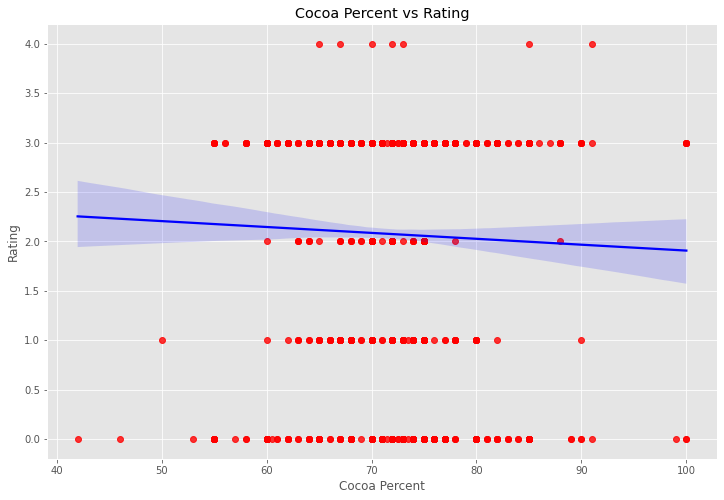

In [81]:
sns.regplot(x="cocoa_percent", y="nrating_system", data=fg, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

plt.title("Cocoa Percent vs Rating")

plt.xlabel('Cocoa Percent')

plt.ylabel('Rating')

plt.show()

In [82]:
correlation = fg['cocoa_percent'].corr(fg['nrating_system'])
print(correlation)

-0.02436304518822164


A correlation coefficient of -0.02436 indicates a very weak and almost negligible negative correlation between the percentage of cocoa in the chocolate bars and customer rating.

The negative sign of the correlation coefficient suggests that there is a very slight tendency for higher cocoa percentages to be associated with slightly lower customer ratings. However, the magnitude of the correlation coefficient is very close to zero, indicating that there is essentially no meaningful relationship between these two variables.

In practical terms, this means that the percentage of cocoa in the chocolate bars has almost no impact on the customer rating. Other factors, such as taste, texture, brand reputation, or individual preferences, likely play a much more significant role in determining the ratings given by customers.

**Let's see if the number of ingredients in the chocolate bars has an effect on the way the chocolate bars where rated**

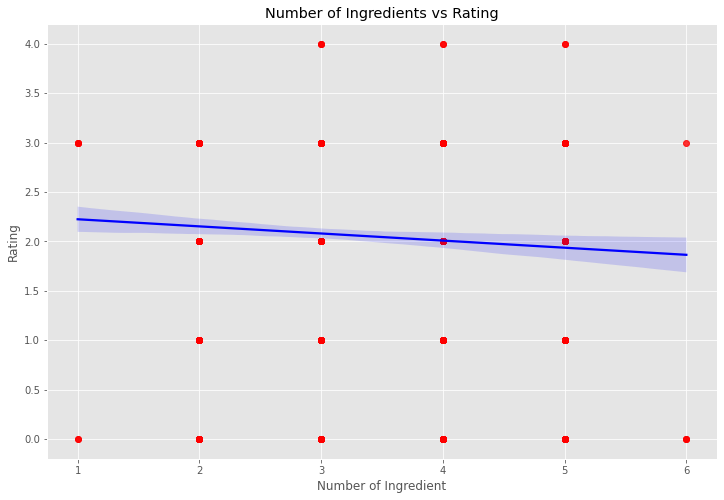

In [83]:
sns.regplot(x="num_ingredients", y="nrating_system", data=fg, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

plt.title("Number of Ingredients vs Rating")

plt.xlabel('Number of Ingredient')

plt.ylabel('Rating')

plt.show()

In [84]:
correlation = fg['num_ingredients'].corr(fg['nrating_system'])
print(correlation)

-0.05211947736706437


The correlation coefficient of -0.0521 suggests a weak negative correlation between the number of ingredients in chocolate bars and customer ratings.

Interpreting this correlation coefficient means that as the number of ingredients in chocolate bars increases, there is a slight tendency for customer ratings to decrease slightly. However, the correlation is weak, indicating that the relationship is not strong or consistent.

**Let's see if the year chocolate bars where reviewed has an effect on the way the chocolate bars where rated**

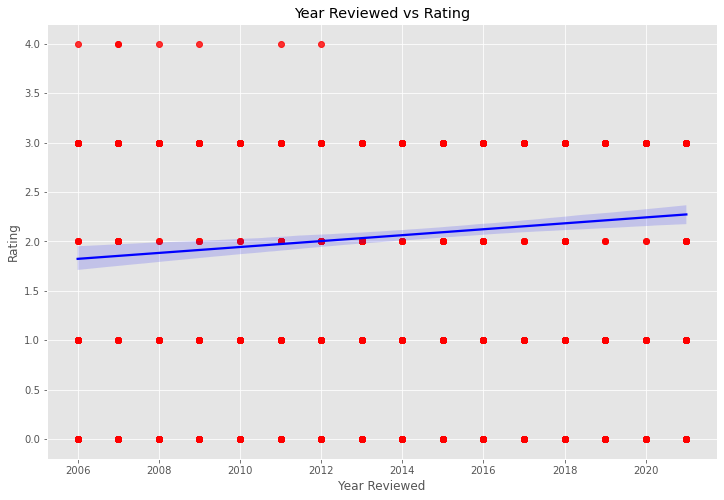

In [85]:
sns.regplot(x="year_reviewed", y="nrating_system", data=fg, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

plt.title("Year Reviewed vs Rating")

plt.xlabel('Year Reviewed')

plt.ylabel('Rating')

plt.show()

In [86]:
correlation = fg['year_reviewed'].corr(fg['nrating_system'])
print(correlation)

0.0936952047750396


Interpreting the correlation coefficient, we can say that there is a slight tendency for higher customer ratings to be associated with more recent years of chocolate bar reviews. However, the correlation is weak, meaning that the relationship is not very strong or reliable. Other factors beyond the year of review likely have a greater influence on the customer ratings.

In [124]:
correlation = fg['ratio'].corr(fg['nrating_system'])
print(correlation)

0.3170204476023252


## Conclusion

After embarking on an epic quest, I've discovered that the consumer rating of chocolate bars cannot be solely attributed to any single factor. It seems like a spellbinding mix of marketing enchantments, the ancient origins of the company, the whimsical distribution methods, and so much more, all have a mesmerizing influence on the final rating. To unravel the recipe for chocolaty triumph and achieve soaring ratings, we must embark on a grand adventure to gather more data and unleash the powers of further analysis! Let the chocolatey odyssey begin!

The cocoa percentage in chocolate bars has almost no impact on customer preferences. A correlation coefficient of -0.02436 indicates a very weak and negligible negative correlation. Other factors like taste, texture, brand reputation, and individual preferences play a more significant role in determining consumer ratings.

The country of origin does not have a substantial influence on chocolate bar perceptions. The correlation coefficient of -0.0363 suggests a weak negative relationship between the location of the chocolate bar company and customer rating. This close-to-zero correlation implies that there is almost no linear relationship between company location and customer rating.

In practical terms, this means that the location of the chocolate bar company has no significant impact on customer ratings. Other factors, such as chocolate quality, ingredients, brand reputation, and marketing, play a more significant role in shaping customer perceptions and ratings.